In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Step 1: Load and Explore Data

In [2]:
df= pd.read_csv("climate_change_data.csv")
df

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


## Step 2: Handle missing data

In [4]:
df.isna().mean()* 100

Date              0.0
Location          0.0
Country           0.0
Temperature       0.0
CO2 Emissions     0.0
Sea Level Rise    0.0
Precipitation     0.0
Humidity          0.0
Wind Speed        0.0
dtype: float64

In [5]:
df.duplicated().sum()

0

In [6]:
data = pd.DataFrame()
def summary (df):
    data['Null Value'] = df.isna().mean()
    data['Dplicated Value'] = df.duplicated().sum()
    data['Data Type'] = df.dtypes
    data['Min Value'] = df.min()
    data['Max Value'] = df.max()
    return data

summary(df)
    

,Null Value,Dplicated Value,Data Type,Min Value,Max Value
Date,0.0,0,object,2000-01-01 00:00:00.000000000,2022-12-31 00:00:00.000000000
Location,0.0,0,object,Aaronberg,Zunigaburgh
Country,0.0,0,object,Afghanistan,Zimbabwe
Temperature,0.0,0,float64,-3.803589,33.976956
CO2 Emissions,0.0,0,float64,182.13122,582.899701
Sea Level Rise,0.0,0,float64,-4.092155,4.116559
Precipitation,0.0,0,float64,0.010143,99.9919
Humidity,0.0,0,float64,0.018998,99.959665
Wind Speed,0.0,0,float64,0.001732,49.997664


In [7]:
df.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

## Step 3: Exploratory Data Analysis

In [8]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [9]:
df.skew()

Temperature      -0.018649
CO2 Emissions    -0.025256
Sea Level Rise   -0.053729
Precipitation     0.006910
Humidity          0.006083
Wind Speed        0.006490
dtype: float64

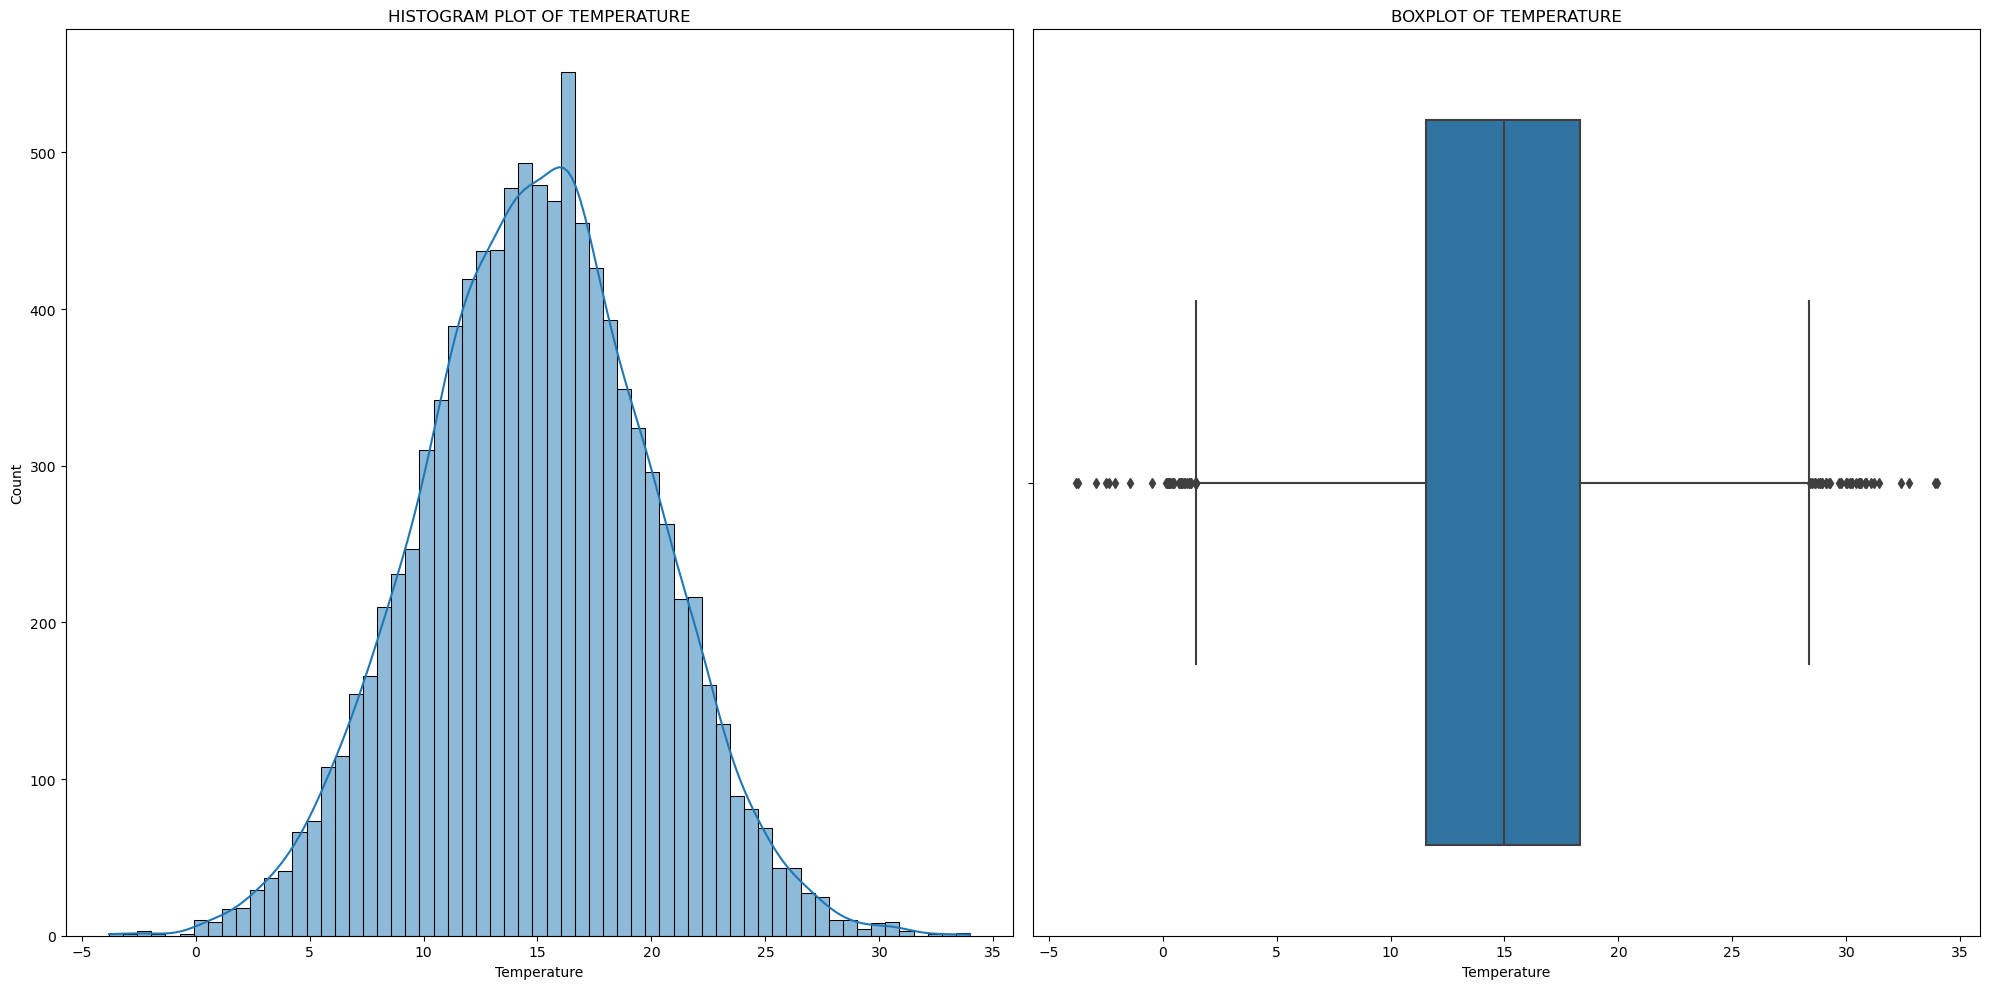

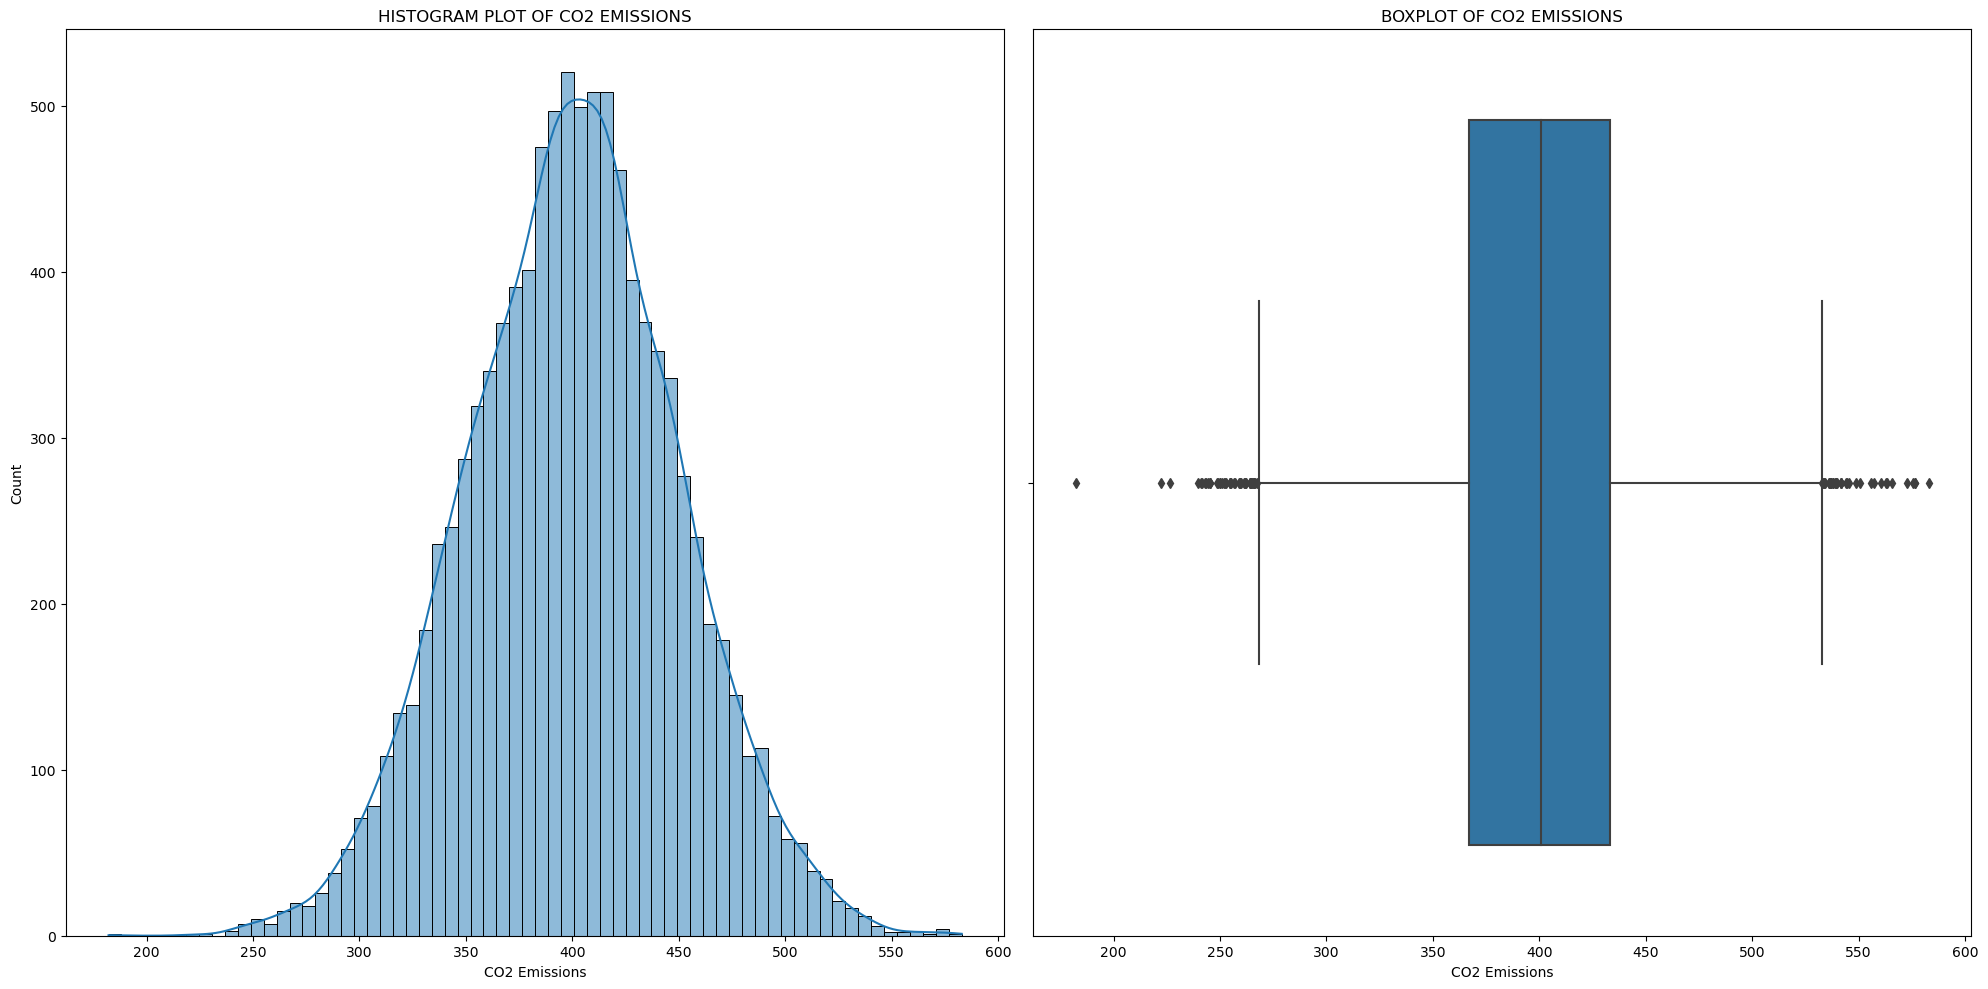

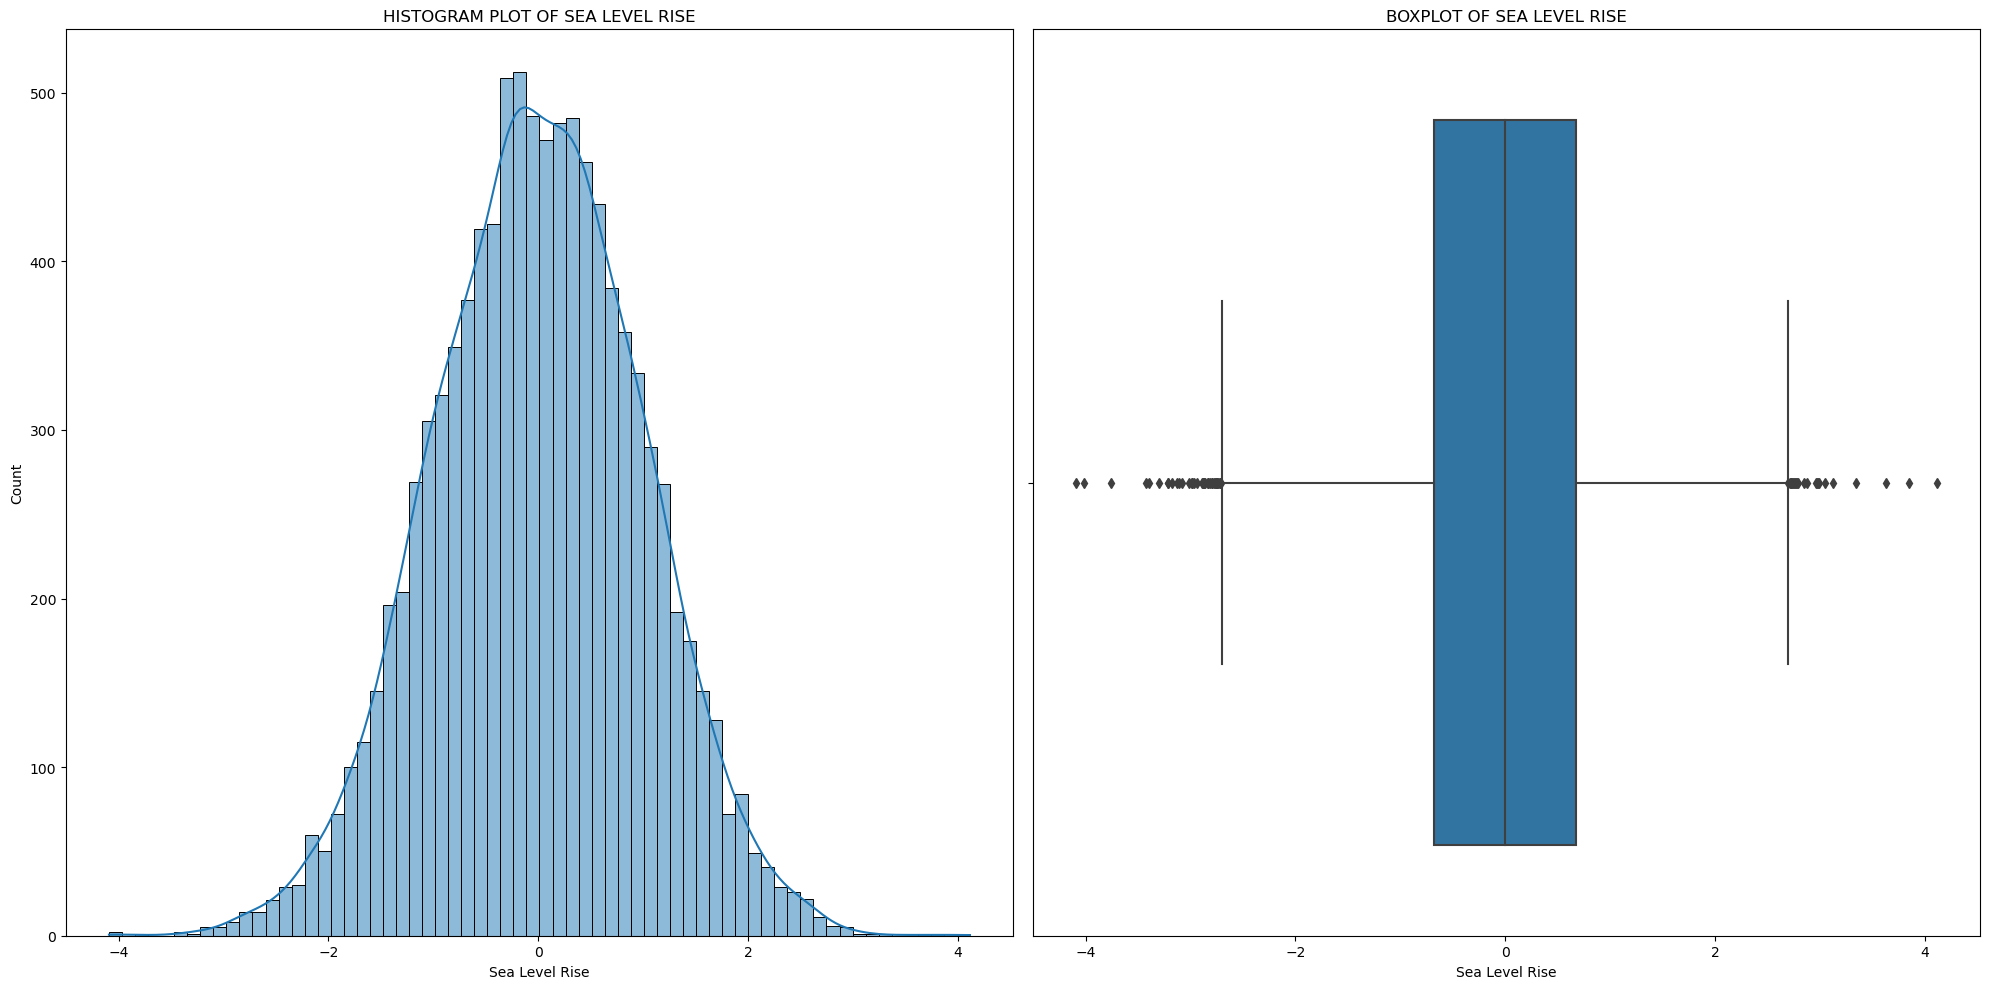

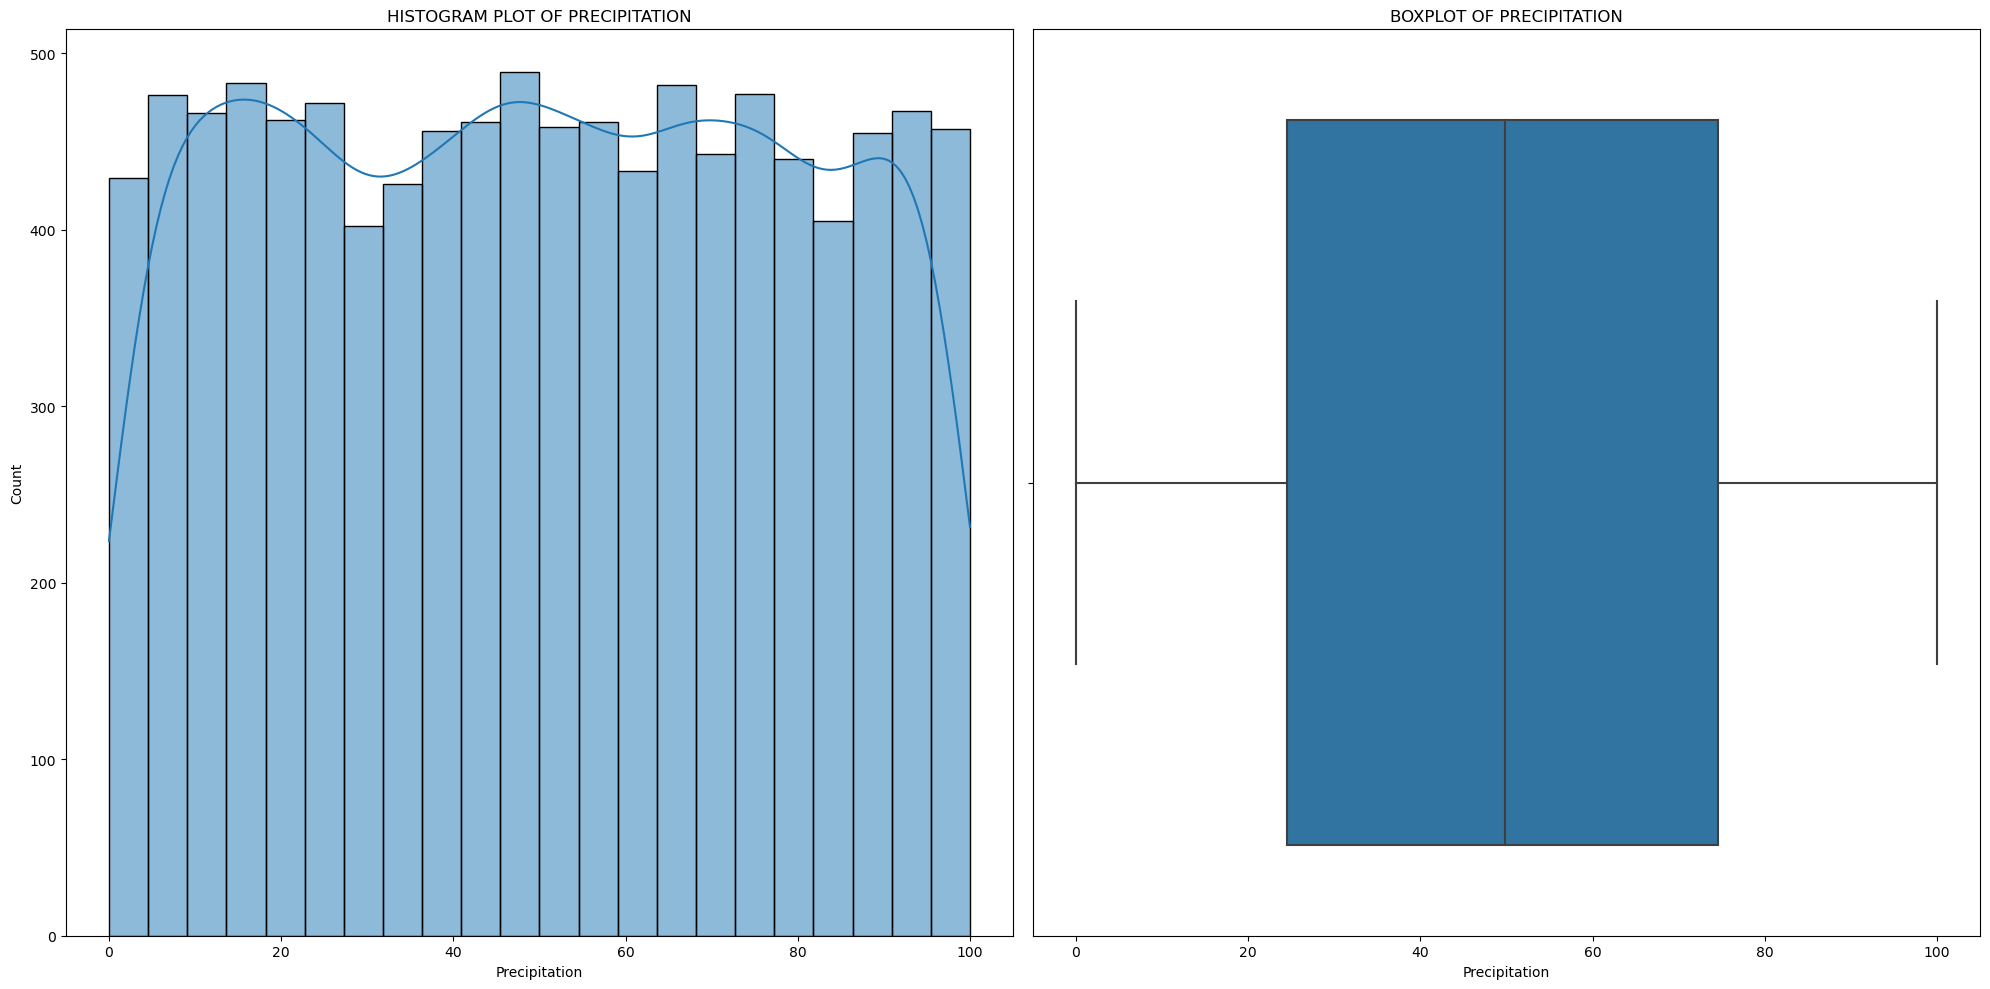

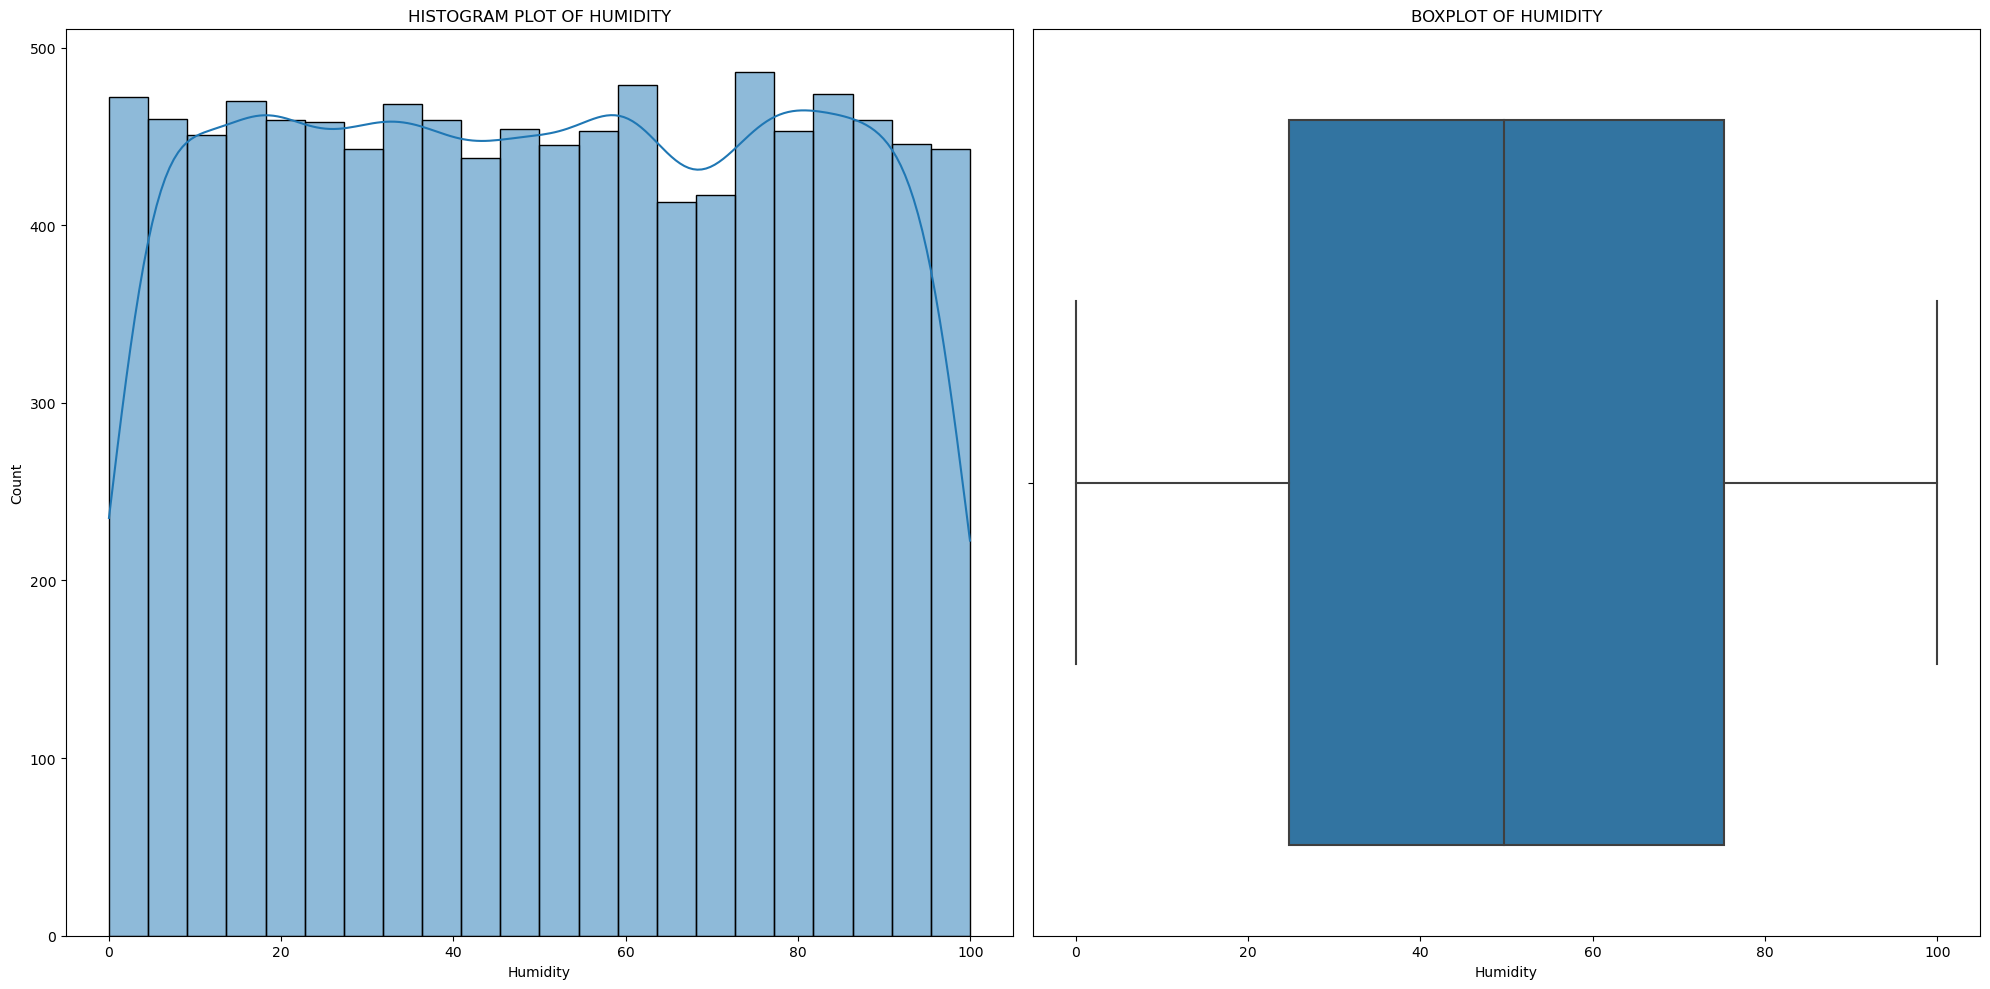

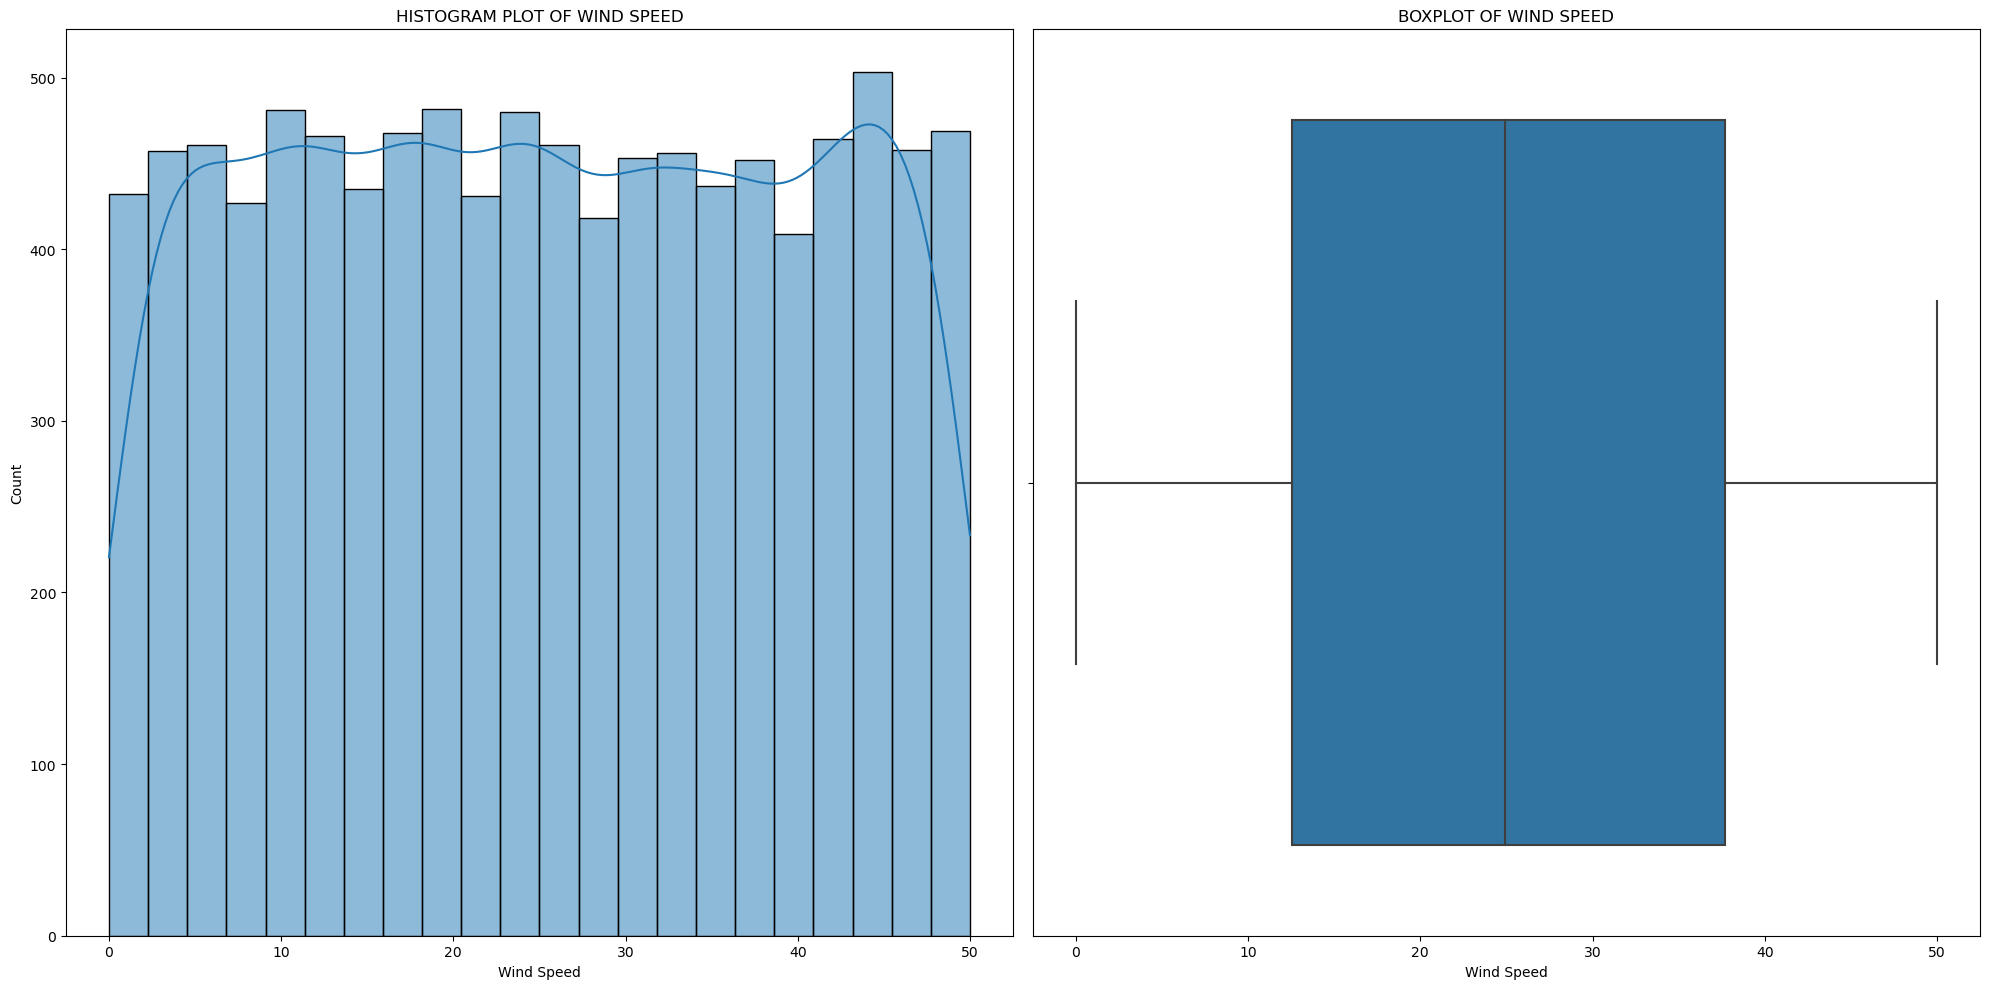

In [10]:
numerical = df.select_dtypes(include = [np.number]).columns

for col in numerical:
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.title(f"Histogram plot of {col}".upper())
    sns.histplot (df[col], kde=True)
    
    plt.subplot(122)
    plt.title(f"Boxplot of {col}".upper())
    sns.boxplot(x = df[col])
    plt.tight_layout()
    plt.show()
    

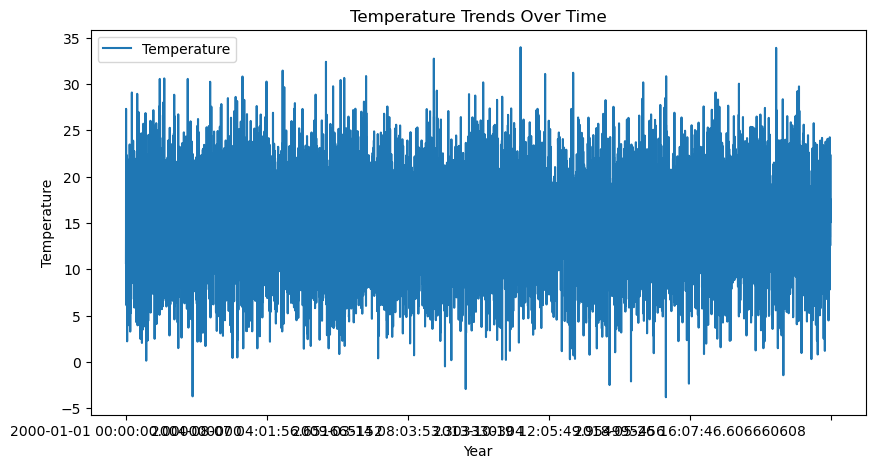

In [11]:
# Visualization: Time-series plot of Temperature
df.set_index('Date')[['Temperature']].plot(figsize=(10, 5))
plt.title('Temperature Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

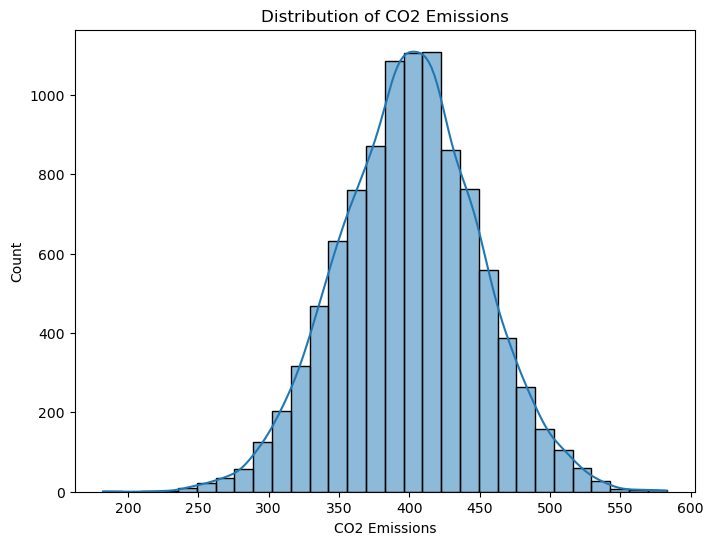

In [12]:
# Main column to predict is CO2 Emissions, so explore its distribution
plt.figure(figsize=(8,6))
sns.histplot(df['CO2 Emissions'], kde=True, bins=30)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.show()


In [13]:

# Summary statistics
print("\
Summary Statistics for CO2 Emissions:")
print(df['CO2 Emissions'].describe())


Summary Statistics for CO2 Emissions:
count    10000.000000
mean       400.220469
std         49.696933
min        182.131220
25%        367.109330
50%        400.821324
75%        433.307905
max        582.899701
Name: CO2 Emissions, dtype: float64


In [14]:
# Top 5 countries with highest average CO2 emissions
print("\
Top 5 Countries by Average CO2 Emissions:")
print(df.groupby('Country')['CO2 Emissions'].mean().sort_values(ascending=False).head())

Top 5 Countries by Average CO2 Emissions:
Country
Belize                 422.184798
Mali                   420.245877
Myanmar                420.009657
Hong Kong              419.108583
Trinidad and Tobago    418.341029
Name: CO2 Emissions, dtype: float64


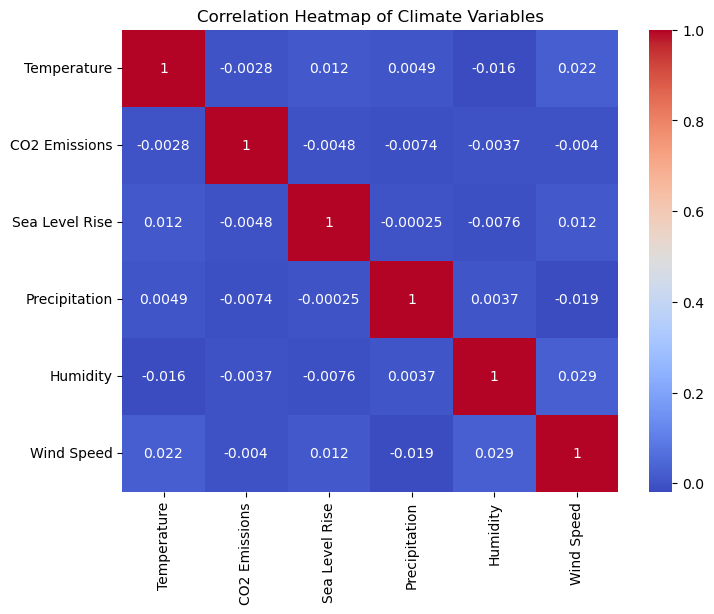

In [15]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Climate Variables')
plt.show()


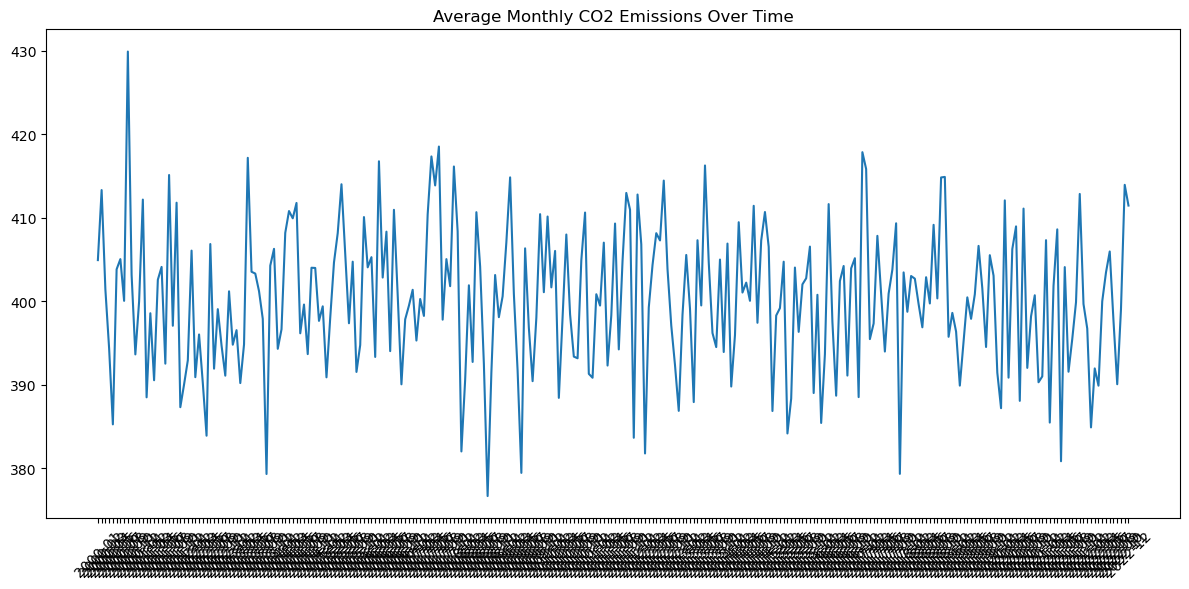

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
# Time series of CO2 emissions
plt.figure(figsize=(12, 6))
df_monthly = df.groupby(df['Date'].dt.to_period('M'))['CO2 Emissions'].mean().reset_index()
df_monthly['Date'] = df_monthly['Date'].astype(str)
plt.plot(df_monthly['Date'], df_monthly['CO2 Emissions'])
plt.title('Average Monthly CO2 Emissions Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


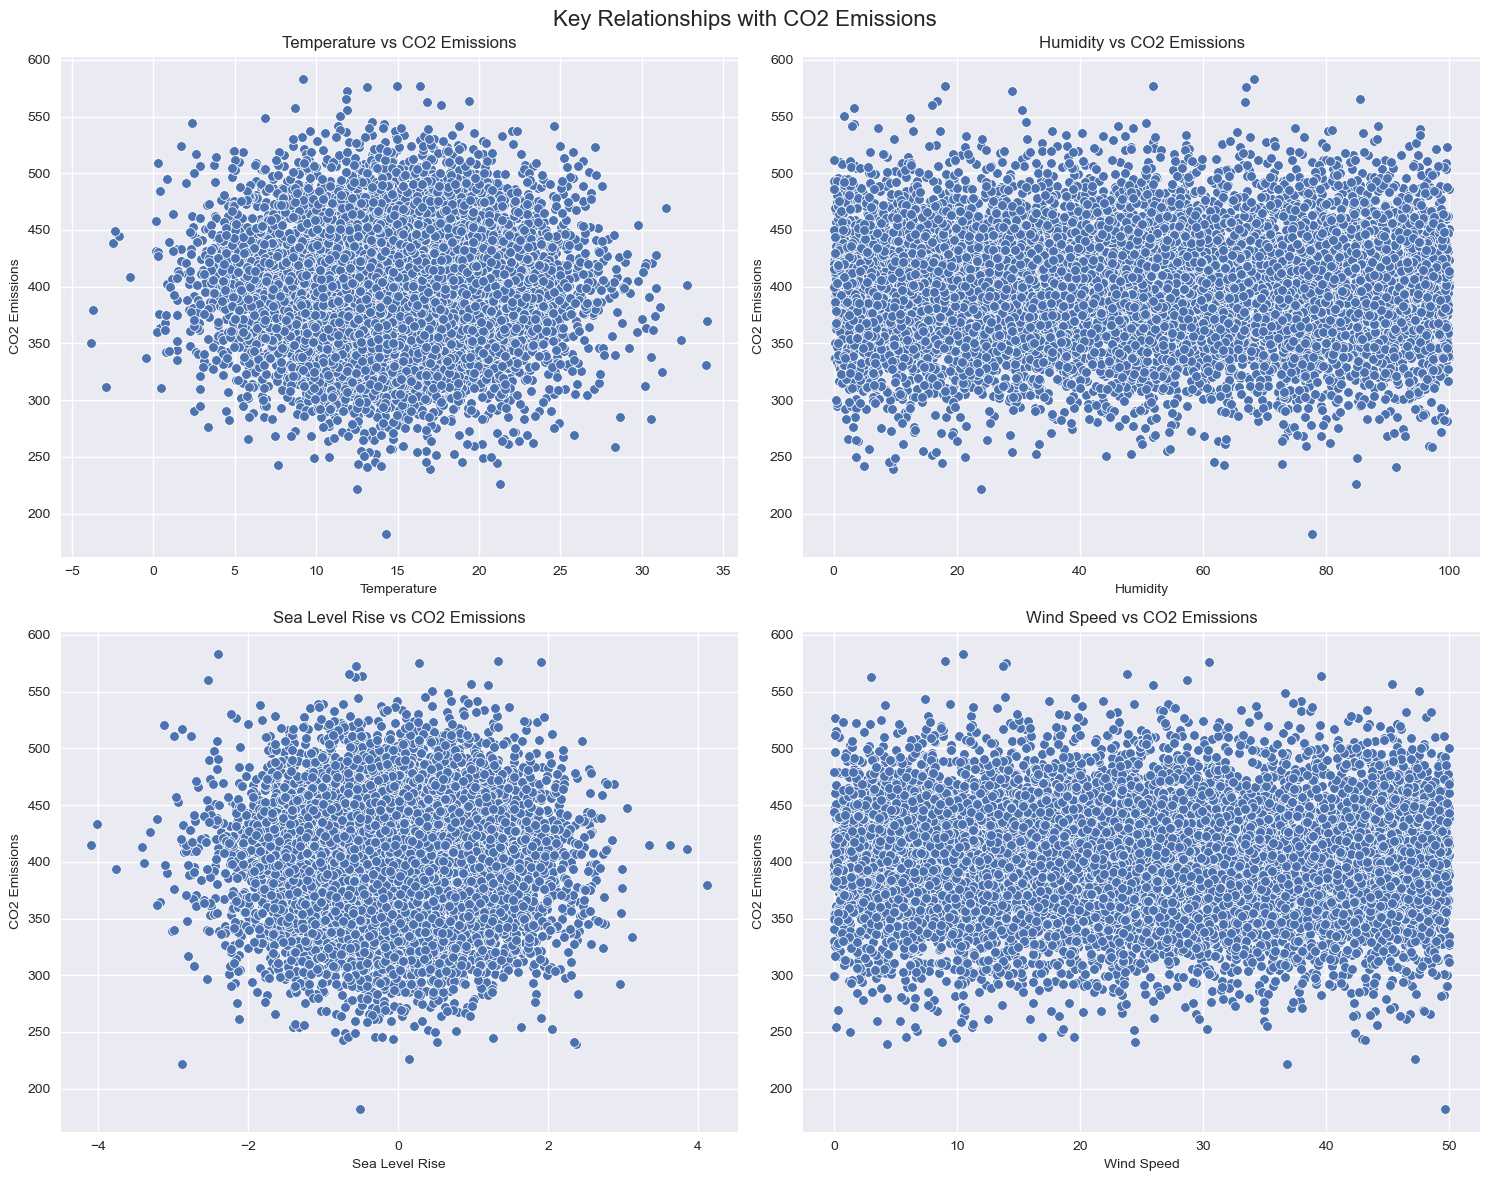

In [17]:
# Set style
plt.style.use('seaborn')

# Create subplots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Key Relationships with CO2 Emissions', fontsize=16)

# Temperature vs CO2
sns.scatterplot(data=df, x='Temperature', y='CO2 Emissions', ax=axes[0,0])
axes[0,0].set_title('Temperature vs CO2 Emissions')

# Humidity vs CO2
sns.scatterplot(data=df, x='Humidity', y='CO2 Emissions', ax=axes[0,1])
axes[0,1].set_title('Humidity vs CO2 Emissions')

# Sea Level Rise vs CO2
sns.scatterplot(data=df, x='Sea Level Rise', y='CO2 Emissions', ax=axes[1,0])
axes[1,0].set_title('Sea Level Rise vs CO2 Emissions')

# Wind Speed vs CO2
sns.scatterplot(data=df, x='Wind Speed', y='CO2 Emissions', ax=axes[1,1])
axes[1,1].set_title('Wind Speed vs CO2 Emissions')

plt.tight_layout()
plt.show()

## Insight

## Step 5: Feature Engineering

In [18]:
##Let us convert Date column to the datetime colum
df['Date'] = pd.to_datetime( df['Date'])

def date_time_feat(df, date_column):
    # Extract features
    df["year"] = df[date_column].dt.year
    df["month"] = df[date_column].dt.month
    df["day"] = df[date_column].dt.day
    df["weekday"] = df[date_column].dt.weekday  # Monday = 0, Sunday = 6
    df["weekofyear"] = df[date_column].dt.isocalendar().week
    df["hour"] = df[date_column].dt.hour
    df["minute"] = df[date_column].dt.minute
    df["second"] = df[date_column].dt.second
    df['year_diff'] = 2025 - df['year']
    df = df.drop(columns = ['Date'])
    return df

df = date_time_feat(df, "Date")


In [19]:
def new_feat (df):
# Temperature Compensation with advanced scaling
    temp_ref = 25.0
    humidity_ref = 50.0
     # Temperature compensation
    df['temp_factor'] =  df['Temperature'] - temp_ref
    # Humidity compensation
    df['humid_factor'] = df['Humidity'] - humidity_ref
    
    # Environmental Features
    df['Temp_Humid_interaction'] = df['Temperature'] * df['Humidity']
    df['Temp_Humid_ratio'] = df['Temperature'] / (df['Humidity'] + 1e-6)
    
    # Interaction Features
    df['Temp_Humidity'] = df['Temperature'] * df['Humidity']
    df['Wind_Temp'] = df['Wind Speed'] * df['Temperature']
    df['Precip_SeaLevel'] = df['Precipitation'] * df['Sea Level Rise']
    # Derived Features
    df['Relative_Humidity'] = df['Humidity'] / 100
    return df

df = new_feat(df)
df

,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,year,month,...,second,year_diff,temp_factor,humid_factor,Temp_Humid_interaction,Temp_Humid_ratio,Temp_Humidity,Wind_Temp,Precip_SeaLevel,Relative_Humidity
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,...,0,25,-14.311014,-26.368744,252.594166,0.452324,252.594166,197.661006,9.926866,0.236313
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,...,43,25,-11.185570,-6.017054,607.599335,0.314086,607.599335,473.134565,49.403050,0.439829
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,...,26,25,2.323718,46.652600,2640.908353,0.282700,2640.908353,932.401677,-6.865100,0.966526
3,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,...,9,25,-12.690419,-2.532062,584.310411,0.259324,584.310411,105.303087,-2.471675,0.474679
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,...,53,25,-11.789115,11.789672,816.296251,0.213804,816.296251,105.702454,89.378685,0.617897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866,2022,12,...,6,3,-9.979477,-24.706186,379.926310,0.593842,379.926310,98.112039,-135.664334,0.252938
9996,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,2022,12,...,50,3,-8.227549,46.787402,1623.361932,0.173292,1623.361932,708.619499,27.117187,0.967874
9997,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,2022,12,...,33,3,-2.629975,-34.788175,340.288896,1.470568,340.288896,409.230691,31.478587,0.152118
9998,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255,2022,12,...,16,3,-5.569147,32.774520,1608.379559,0.234744,1608.379559,824.339477,-16.950611,0.827745


In [20]:
grp = df.groupby('Country')['CO2 Emissions'].agg(['min', 'max', 'std', 'mean'])
grp.head(20)

,min,max,std,mean
Country,,,,
Afghanistan,282.225843,576.498970,59.242990,403.029928
Albania,309.998163,529.386693,53.050363,403.086827
Algeria,269.431996,491.187335,56.764209,401.639539
American Samoa,306.017481,491.278330,42.474487,392.449374
Andorra,274.166728,489.732647,46.096281,410.238930
Angola,285.405236,526.455712,48.844066,406.920812
Anguilla,300.929314,482.991240,40.477848,396.466225
Antarctica (the territory South of 60 deg S),272.377072,541.759475,53.483690,394.764431
Antigua and Barbuda,278.542691,505.768572,50.723029,407.234749


In [21]:
grp_1 = df.groupby('year')['CO2 Emissions'].agg(['min', 'max', 'std', 'mean'])
grp_1.head(20)

,min,max,std,mean
year,,,,
2000,249.005944,555.647706,50.289531,402.903439
2001,259.819528,582.899701,49.814935,399.301274
2002,241.219695,529.836649,51.134624,395.342856
2003,243.456176,563.507328,50.772863,399.121797
2004,243.102521,560.281225,49.420216,402.220557
2005,267.472574,539.521701,49.105201,401.659472
2006,239.630431,521.081273,48.674902,401.909974
2007,254.819248,548.928803,50.821311,406.495189
2008,254.685946,576.498970,49.164911,396.053173


In [22]:
df.columns

Index(['Location', 'Country', 'Temperature', 'CO2 Emissions', 'Sea Level Rise',
       'Precipitation', 'Humidity', 'Wind Speed', 'year', 'month', 'day',
       'weekday', 'weekofyear', 'hour', 'minute', 'second', 'year_diff',
       'temp_factor', 'humid_factor', 'Temp_Humid_interaction',
       'Temp_Humid_ratio', 'Temp_Humidity', 'Wind_Temp', 'Precip_SeaLevel',
       'Relative_Humidity'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler


df = df.drop(columns = ['Location', 'Country'])
scaler = StandardScaler()
def scaling (df):
    Independents = [col for col in df.columns if col not in ['CO2 Emissions'] ]
    for col in Independents:
        df[col] = scaler.fit_transform(df[[col]])
    return df

df =scaling(df)
        
    

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['CO2 Emissions'] )
y = df['CO2 Emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

            

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBRFRegressor

models = {
    "Random Forest": RandomForestRegressor(random_state= 2025),
    "Extra _Tree" : ExtraTreeRegressor(random_state= 2025),
    "Cat Bosst" : CatBoostRegressor(verbose = False, random_state= 2025),
    "Light GBM" : LGBMRegressor(verbose = -1, random_state =2025),
    "xgboost" : XGBRegressor(),
    "new_xg" : XGBRFRegressor()
 }

In [26]:
rmse_list  = []
mae_list  = []
r2_list  = []
model_name_list  = []




for name, model in models.items():
    print (f"Working on the {name}")
    model_name_list.append(name)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse_score = mean_squared_error(y_test, y_pred, squared=False)
    rmse_list.append(rmse_score)
    
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_list.append(mae_score)
    
    r2 = r2_score(y_test, y_pred)
    r2_list.append(r2)
    print (f"Done with {name}")
    print(f"*" *50)
    
    
result = pd.DataFrame({"RMSE_SCORE" : rmse_list,
                          "MAE_SCORE": mae_list,
                          "R2_SCORE": r2_list }, index = model_name_list)

result
    
    
    


Working on the Random Forest
Done with Random Forest
**************************************************
Working on the Extra _Tree
Done with Extra _Tree
**************************************************
Working on the Cat Bosst
Done with Cat Bosst
**************************************************
Working on the Light GBM
Done with Light GBM
**************************************************
Working on the xgboost
Done with xgboost
**************************************************
Working on the new_xg
Done with new_xg
**************************************************


,RMSE_SCORE,MAE_SCORE,R2_SCORE
Random Forest,50.490742,40.124042,-0.027567
Extra _Tree,71.677417,57.306696,-1.070863
Cat Bosst,51.282089,40.787261,-0.060030
Light GBM,50.865551,40.680961,-0.042880
xgboost,54.200863,43.242493,-0.184129
new_xg,49.909174,39.708849,-0.004032


In [27]:
##the new xg is the best model because it has the lowest rmse and mae score compare to others model

#the best model is new_xgb

best = XGBRFRegressor()
best.fit(X_train, y_train)
y_pred = best.predict(X_test)


In [28]:
#Dispaly the prediction in dataframe
prediction_df = pd.DataFrame({
    "True Class": y_test,
    "Predicted Class": y_pred
})

prediction_df.head(20)

,True Class,Predicted Class
6448,412.210749,401.094666
3544,344.920302,396.827454
3904,411.765237,403.954498
9739,347.490838,400.263916
8295,342.325864,401.635376
3600,407.838325,401.219208
1457,335.383100,397.058319
6938,514.546101,396.197632
984,472.307003,400.819458
9586,402.474828,400.554565
